 ## Guía de Trabajos Prácticos 5

# **Librerías**

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
import imutils

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


Activo mi entorno GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Ejercicio 1:** Conceptos básicos de la TDF 2D


1. Construya imágenes binarias de: una línea horizontal, una línea vertical, un cuadrado centrado, un rectángulo centrado, un círculo.
¿Qué espera ver en las TDF (Transformadas de Fourier Discretas) de cada una de estas? ¿Cómo estima que estará distribuida la energía?

In [ ]:
def get_dft(image):
    dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1e-6) # sumo para q no haga log(0)
    return magnitude_spectrum

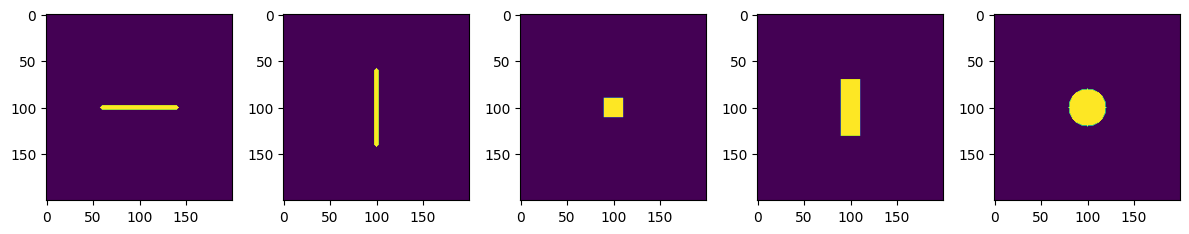

In [ ]:
size = [200,200]
center = (size[1] // 2, size[0] // 2)

img_linea_h = np.zeros(size, dtype=np.uint8)
cv.line(img_linea_h, (center[0] - 40, center[1]), (center[0] + 40, center[1]), 255, 3)

img_linea_v = np.zeros(size, dtype=np.uint8)
cv.line(img_linea_v, (center[0], center[1] - 40), (center[0], center[1] + 40), 255, 3)

img_cuadrado = np.zeros(size, dtype=np.uint8)
cv.rectangle(img_cuadrado, (center[0] - 10, center[1] - 10), (center[0] + 10, center[1] + 10), 255, -1)

img_rectangulo = np.zeros(size, dtype=np.uint8)
cv.rectangle(img_rectangulo, (center[0] - 10, center[1] - 30), (center[0] + 10, center[1] + 30), 255, -1)

img_circulo = np.zeros(size, dtype=np.uint8)
cv.circle(img_circulo, center, 20, 255, -1)

fig,ax = plt.subplots(1,5, figsize=(12,5))
ax[0].imshow(img_linea_h)
ax[1].imshow(img_linea_v)
ax[2].imshow(img_cuadrado)
ax[3].imshow(img_rectangulo)
ax[4].imshow(img_circulo)
plt.tight_layout()
plt.show()

En las FFT de cada imágen deberíamos poder ver líneas perpendiculares a las que se ven en las imágenes. Luego, para la línea horizontal deberíamos ver una línea vertical, para la horizontal una vertical, para el rectángulo y el cuadrado un + y para el círculo deberíamos ver círculos propagándose porque el círculo es perpendicular para infinitos puntos.

2) Utilice cada una de las imágenes anteriores para calcular la TDF y visualice.
¿Se cumplieron sus pronósticos respecto de sus definiciones?
Varíe las dimensiones y localización de los objetos en estas imágenes y repita
el análisis.

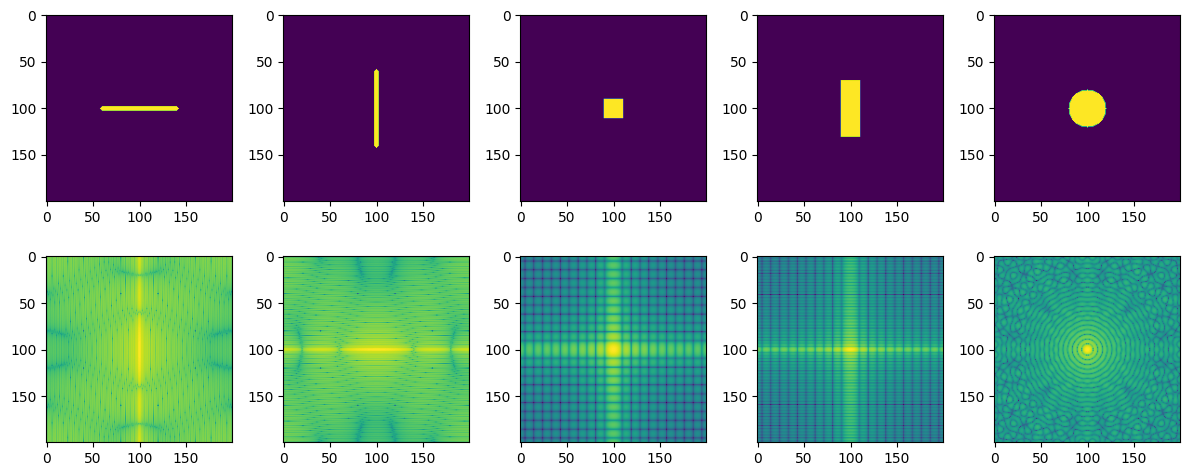

In [ ]:
fig,ax = plt.subplots(2,5, figsize=(12,5))

fft_linea_h = get_dft(img_linea_h)
ax[0,0].imshow(img_linea_h)
ax[1,0].imshow(fft_linea_h)

fft_linea_v = get_dft(img_linea_v)
ax[0,1].imshow(img_linea_v)
ax[1,1].imshow(fft_linea_v)

fft_cuadrado = get_dft(img_cuadrado)
ax[0,2].imshow(img_cuadrado)
ax[1,2].imshow(fft_cuadrado)

fft_rectangulo = get_dft(img_rectangulo)
ax[0,3].imshow(img_rectangulo)
ax[1,3].imshow(fft_rectangulo)

fft_circulo = get_dft(img_circulo)
ax[0,4].imshow(img_circulo)
ax[1,4].imshow(fft_circulo)

plt.tight_layout()
plt.show()

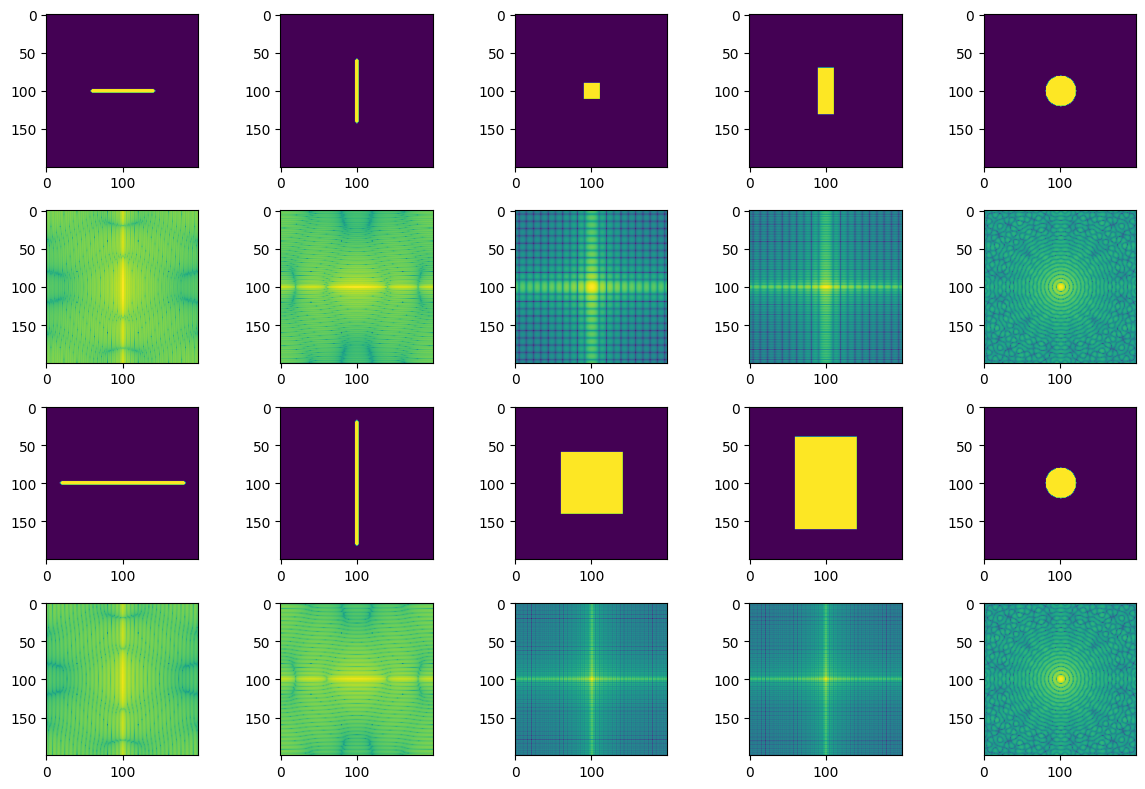

In [ ]:
center = (size[1] // 2, size[0] // 2)

img_linea_h_2 = np.zeros(size, dtype=np.uint8)
cv.line(img_linea_h_2, (center[0] - 80, center[1]), (center[0] + 80, center[1]), 255, 3)
fft_linea_h_2 = get_dft(img_linea_h_2)

img_linea_v_2 = np.zeros(size, dtype=np.uint8)
cv.line(img_linea_v_2, (center[0], center[1] - 80), (center[0], center[1] + 80), 255, 3)
fft_linea_v_2 = get_dft(img_linea_v_2)

img_cuadrado_2 = np.zeros(size, dtype=np.uint8)
cv.rectangle(img_cuadrado_2, (center[0] - 40, center[1] - 40), (center[0] + 40, center[1] + 40), 255, -1)
fft_cuadrado_2 = get_dft(img_cuadrado_2)

img_rectangulo_2 = np.zeros(size, dtype=np.uint8)
cv.rectangle(img_rectangulo_2, (center[0] - 40, center[1] - 60), (center[0] + 40, center[1] + 60), 255, -1)
fft_rectangulo_2 = get_dft(img_rectangulo_2)

img_circulo_2 = np.zeros(size, dtype=np.uint8)
cv.circle(img_circulo_2, center, 20, 255, -1)
fft_circulo_2 = get_dft(img_circulo_2)

fig,ax = plt.subplots(4,5, figsize=(12,8))

ax[0,0].imshow(img_linea_h)
ax[1,0].imshow(fft_linea_h)
ax[0,1].imshow(img_linea_v)
ax[1,1].imshow(fft_linea_v)
ax[0,2].imshow(img_cuadrado)
ax[1,2].imshow(fft_cuadrado)
ax[0,3].imshow(img_rectangulo)
ax[1,3].imshow(fft_rectangulo)
ax[0,4].imshow(img_circulo)
ax[1,4].imshow(fft_circulo)

ax[2,0].imshow(img_linea_h_2)
ax[3,0].imshow(fft_linea_h_2)
ax[2,1].imshow(img_linea_v_2)
ax[3,1].imshow(fft_linea_v_2)
ax[2,2].imshow(img_cuadrado_2)
ax[3,2].imshow(fft_cuadrado_2)
ax[2,3].imshow(img_rectangulo_2)
ax[3,3].imshow(fft_rectangulo_2)
ax[2,4].imshow(img_circulo_2)
ax[3,4].imshow(fft_circulo_2)

plt.tight_layout()
plt.show()

3. Construya una imagen de 512x512, que contenga una línea vertical blanca centrada y de un píxel de ancho sobre un fondo negro. Rote la imagen 20 grados y extraiga una sección de 256x256 de la imagen original y de la imagen rotada, de manera que las líneas tengan sus extremos en los bordes superior e inferior, sin márgenes.
Visualice la TDF de ambas imágenes. Explique, utilizando argumentos intuitivos, por qué las magnitudes de Fourier aparecen como lo hacen en las imágenes, y a qué se deben las diferencias.

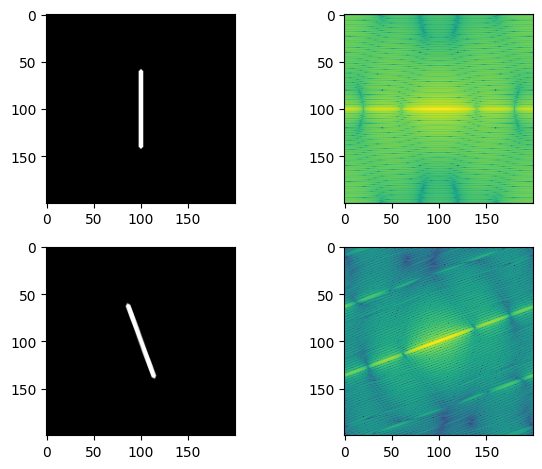

In [ ]:
# podemos usar la de la línea vertical que usamos en el anterior que cumple con lo pedido
angulo = 20
img_linea_rotated = imutils.rotate(img_linea_v, angulo)
fft_linea_rotated = get_dft(img_linea_rotated)

# graficamos:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(img_linea_v,cmap='gray')
ax[0,1].imshow(fft_linea_v)
ax[1,0].imshow(img_linea_rotated,cmap='gray')
ax[1,1].imshow(fft_linea_rotated)
plt.tight_layout()
plt.show()

4. Cargue diferentes imágenes y visualice la magnitud de la TDF. Infiera, a grandes rasgos, la correspondencia entre componentes frecuenciales y detalles de las imágenes.

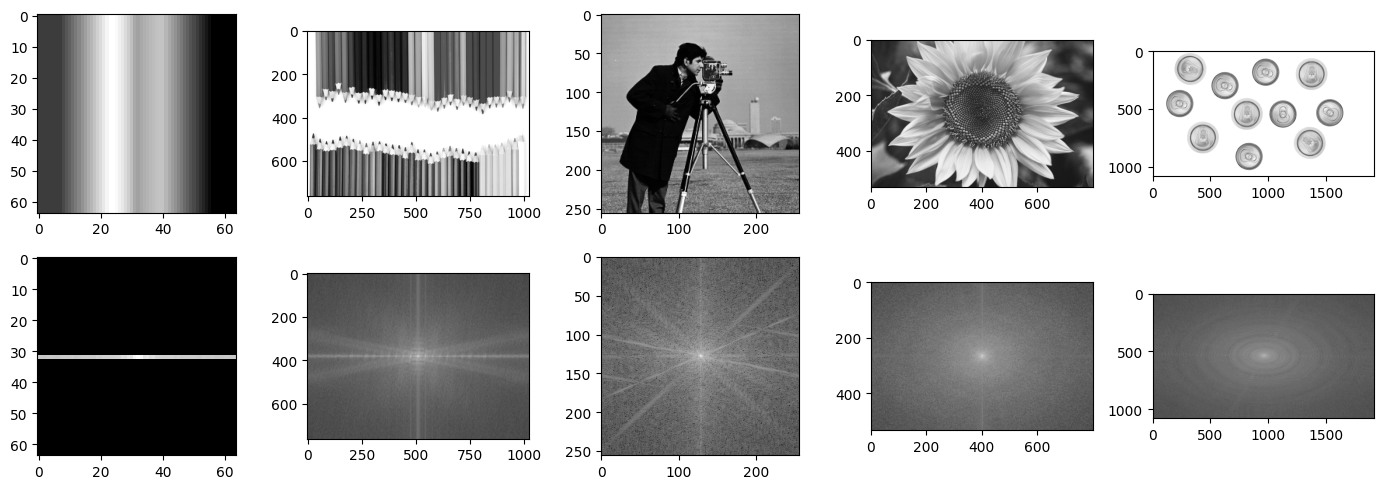

In [ ]:
img = cv.imread("/content/drive/My Drive/PDI/patron.tif",cv.IMREAD_GRAYSCALE)
fft_img = get_dft(img)
img2 = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg",cv.IMREAD_GRAYSCALE)
fft_img2 = get_dft(img2)
img3 = cv.imread("/content/drive/My Drive/PDI/huang2.jpg",cv.IMREAD_GRAYSCALE)
fft_img3 = get_dft(img3)
img4 = cv.imread("/content/drive/My Drive/PDI/flores02.jpg",cv.IMREAD_GRAYSCALE)
fft_img4 = get_dft(img4)
img5 = cv.imread("/content/drive/My Drive/PDI/latas.png",cv.IMREAD_GRAYSCALE)
fft_img5 = get_dft(img5)

# graficamos:
fig, ax = plt.subplots(2,5,figsize=(14,5))
ax[0,0].imshow(img,cmap='gray')
ax[1,0].imshow(fft_img,cmap='gray')
ax[0,1].imshow(img2,cmap='gray')
ax[1,1].imshow(fft_img2,cmap='gray')
ax[0,2].imshow(img3,cmap='gray')
ax[1,2].imshow(fft_img3,cmap='gray')
ax[0,3].imshow(img4,cmap='gray')
ax[1,3].imshow(fft_img4,cmap='gray')
ax[0,4].imshow(img5,cmap='gray')
ax[1,4].imshow(fft_img5,cmap='gray')
plt.tight_layout()
plt.show()

## **Ejercicio 2:** Importancia de la fase

1. Calcule la TDF de una imagen, obtenga magnitud y fase.
Genere una imagen reconstruida sólo con la magnitud considerando fase cero
y genere otra imagen reconstruida usando sólo la fase de la imagen considerando
magnitud unitaria. Visualice las imágenes y saque conclusiones sobre el aporte de ambas componentes a la reconstrucción de la imagen.

In [ ]:
def get_mag_phase(imagen):
  f = np.fft.fft2(imagen)
  fshift = np.fft.fftshift(f)
  magnitud = np.abs(fshift)
  fase = np.angle(fshift)
  return magnitud, fase

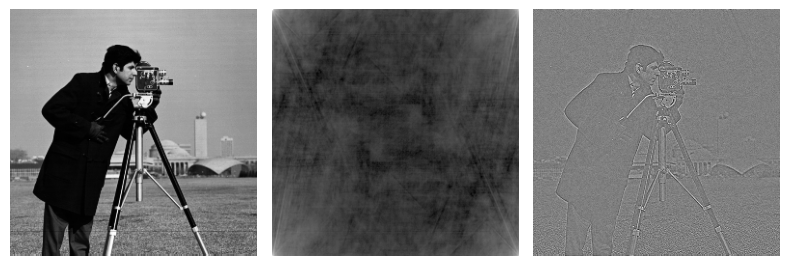

In [ ]:
img = cv.imread("/content/drive/My Drive/PDI/huang2.jpg",cv.IMREAD_GRAYSCALE)
magnitud, fase = get_mag_phase(img)

# Reconstruir la imagen utilizando solo la magnitud (con fase cero)
fase_cero = np.zeros_like(fase)
reconstruida_mag = magnitud * np.exp(1j * fase_cero)  # Magnitud unitaria
reconstruida_img_mag = np.fft.ifft2(np.fft.ifftshift(reconstruida_mag)).real
reconstruida_img_mag = np.log1p(reconstruida_img_mag) # para q no se vea todo negro, no se si está bien hacer esto o si tiene sentido el resultado

# Reconstruir la imagen utilizando solo la fase (con magnitud unitaria)
magnitud_unitaria = np.ones_like(magnitud)
reconstruida_fase = magnitud_unitaria * np.exp(1j * fase)  # Magnitud unitaria
reconstruida_img_fase = np.fft.ifft2(np.fft.ifftshift(reconstruida_fase)).real

fig, ax = plt.subplots(1,3,figsize=(8,8))
ax[0].imshow(img,cmap='gray')
ax[0].axis('off')
ax[1].imshow(reconstruida_img_mag,cmap='gray')
ax[1].axis('off')
ax[2].imshow(reconstruida_img_fase,cmap='gray')
ax[2].axis('off')
plt.tight_layout()
plt.show()

2. Reproduzca el experimento de Openheim utilizando las imágenes puente.jpgy ferrari-c.png. Visualice y comente los resultados.

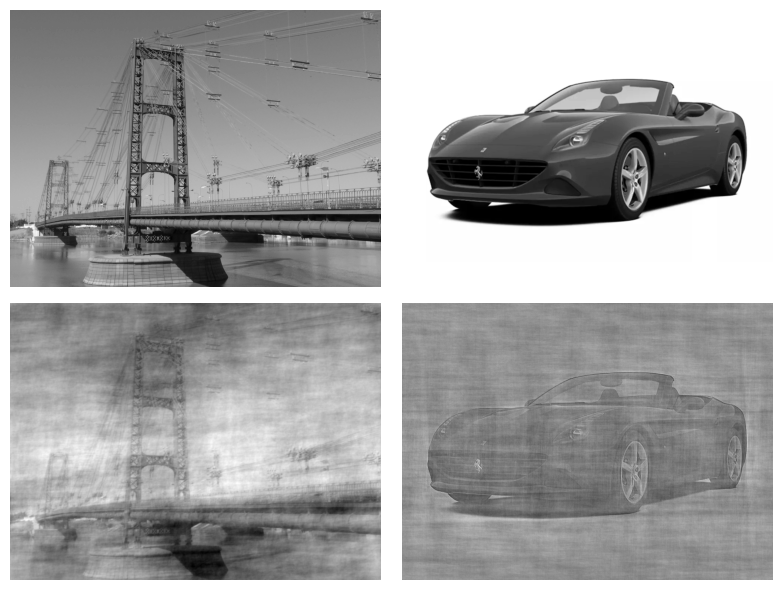

In [ ]:
img_puente = cv.imread("/content/drive/My Drive/PDI/puente.jpg",cv.IMREAD_GRAYSCALE)
img_ferrari = cv.imread("/content/drive/My Drive/PDI/ferrari-c.png",cv.IMREAD_GRAYSCALE)
mag_puente, fase_puente = get_mag_phase(img_puente)
mag_ferrari, fase_ferrari = get_mag_phase(img_ferrari)

# Reconstruir la imagen utilizando solo la magnitud (con fase cero)
mag_puente_fase_ferrari = mag_puente * np.exp(1j * fase_ferrari)
reconstruida1 = np.fft.ifft2(np.fft.ifftshift(mag_puente_fase_ferrari)).real

# Reconstruir la imagen utilizando solo la fase (con magnitud unitaria)
mag_ferrari_fase_puente = mag_ferrari * np.exp(1j * fase_puente)
reconstruida2 = np.fft.ifft2(np.fft.ifftshift(mag_ferrari_fase_puente)).real

fig, ax = plt.subplots(2,2,figsize=(8,6))
ax[0,0].imshow(img_puente,cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(img_ferrari,cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(reconstruida2,cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(reconstruida1,cmap='gray')
ax[1,1].axis('off')
plt.tight_layout()
plt.show()

## **Ejercicio 3:** Filtros pasa-bajos y pasa-altos

1. Construya un filtro pasa-bajos ideal (círculo de altura 1 sobre una matriz de ceros). Cargue una imagen y filtre en el dominio de frecuencias, y recupere la imagen suavizada. Visualice las imágenes y compárelas.
Repita el ejercicio para diferentes frecuencias de corte y compruebe la aparición del fenómeno de Gibbs.

In [ ]:
def get_dft(image):
    dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    return dft_shift

In [ ]:
def apply_filter(image, filter_mask):
    dft_shift = get_dft(image)
    filtered_dft = dft_shift * filter_mask[:, :, np.newaxis]  # Aplicar filtro
    f_ishift = np.fft.ifftshift(filtered_dft)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_back = np.clip(img_back / np.max(img_back), 0, 1)  # Normalizar para visualización
    return img_back

In [ ]:
def ideal_low_pass_filter(shape, cutoff_frequency):
    rows, cols = shape                                        # Consigue las dimensiones de la imagen
    center_row, center_col = rows // 2, cols // 2             # Consigue el centro de la imagen
    filter_mask = np.zeros((rows, cols), dtype=np.float32)    # Crea una matriz de igual tamaño que la imagen pero llena de 0s
    cv.circle(filter_mask, (center_col, center_row),
               cutoff_frequency, 1, thickness=-1)             # Dibuja un circulo de readio "frecuencia de corte" en el centro de la imagen
    return filter_mask                                        # Retorna la máscara

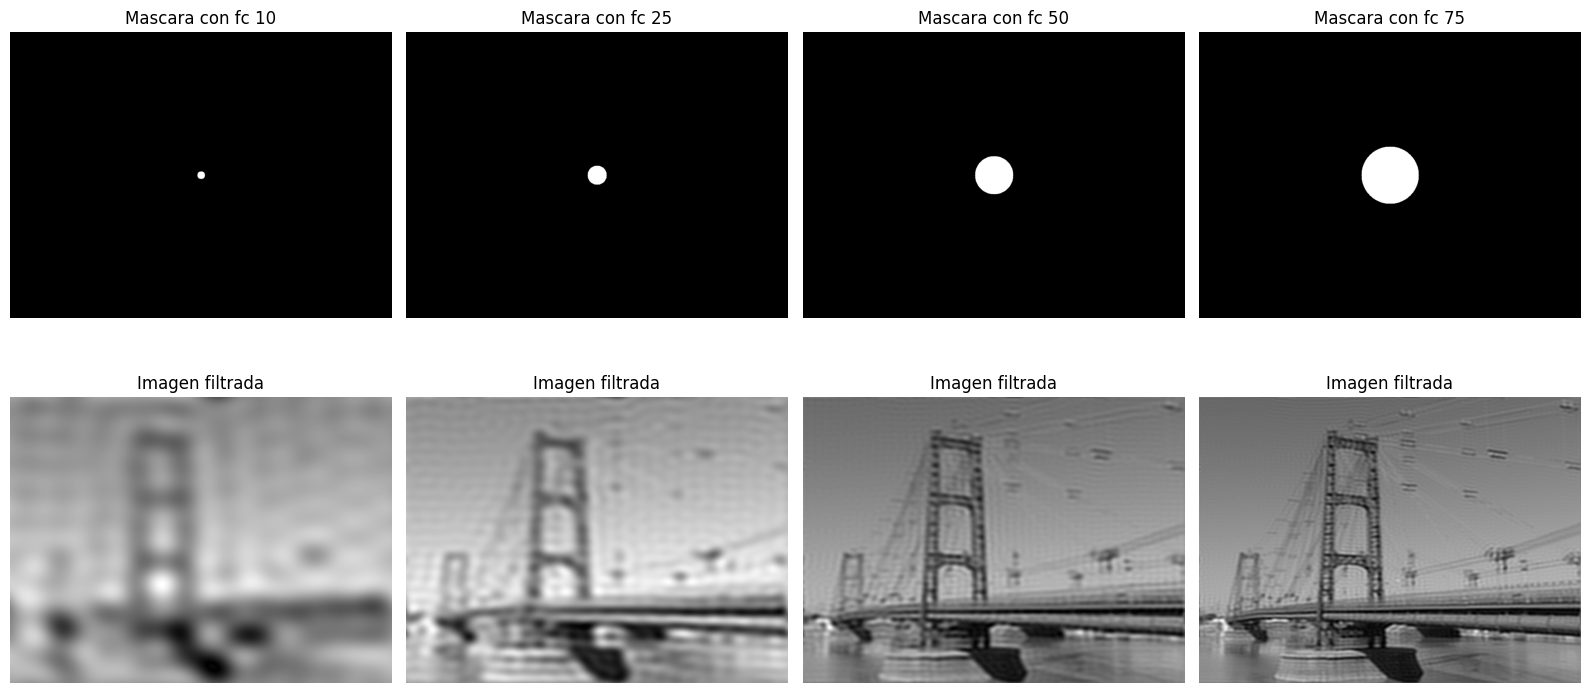

In [ ]:
# Cargar imagen en escala de grises
img = cv.imread('/content/drive/My Drive/PDI/puente.jpg', cv.IMREAD_GRAYSCALE)

# Normalizar imagen
img_float = img.astype(np.float32) / 255.0

# Frecuencias de corte para demostración
cutoff_frequencies = [10, 25, 50, 75]

# Crear figuras para mostrar resultados
plt.figure(figsize=(16, 8))


for i, cutoff in enumerate(cutoff_frequencies, 1):
    filter_mask = ideal_low_pass_filter(img.shape, cutoff)
    filtered_image = apply_filter(img_float, filter_mask)

    plt.subplot(2, 4, i)
    plt.imshow(filter_mask, cmap='gray')
    plt.title(f'Mascara con fc {cutoff}')
    plt.axis('off')
    plt.subplot(2, 4, i+4)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Imagen filtrada')
    plt.axis('off')

plt.tight_layout()
plt.show()

2. Construya un filtro pasa-bajos tipo Butterworth utilizando la definición en
frecuencia. Filtre una imagen, modificando la frecuencia de corte y comprobando el efecto sobre la imagen filtrada. Verifique el efecto del filtro respecto
al fenómeno de Gibbs.



In [ ]:
def butterworth_low_pass_filter(shape, cutoff_frequency, order):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols), dtype=np.float32)

    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - center_row) ** 2 + (v - center_col) ** 2)           # Calcula la distancia al centro de la imagen D(u,v)
            filter_mask[u, v] = 1 / (1 + (distance / cutoff_frequency) ** (2 * order))  # Crea la máscara para Butterwort

    return filter_mask

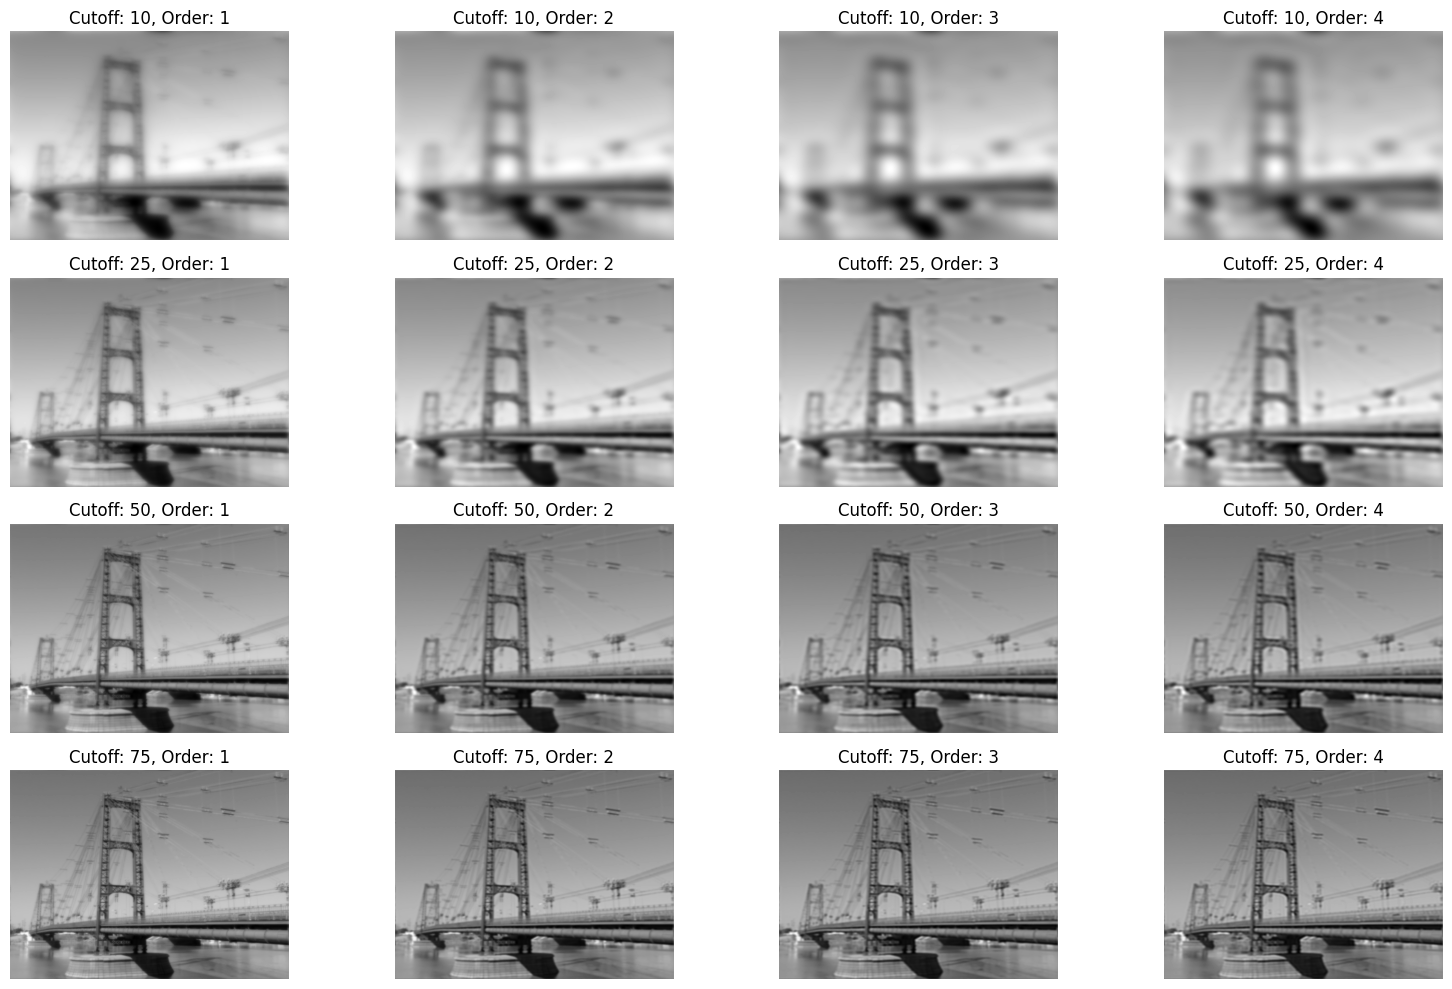

In [ ]:
# Cargar imagen en escala de grises
img = cv2.imread('/content/drive/My Drive/PDI/puente.jpg', cv2.IMREAD_GRAYSCALE)

# Normalizar imagen (se puede omitir este paso, es para normalizar)
img_float = img.astype(np.float32) / 255

# Frecuencias de corte y órdenes para demostración
cutoff_frequencies = [10, 25, 50, 75]
orders = [1, 2, 3, 4]

# Crear figuras para mostrar resultados
plt.figure(figsize=(16, 10))

for i, cutoff in enumerate(cutoff_frequencies, 1):
    for j, order in enumerate(orders, 1):
        filter_mask = butterworth_low_pass_filter(img.shape, cutoff, order)
        filtered_image = apply_filter(img_float, filter_mask)

        plt.subplot(len(cutoff_frequencies), len(orders), (i-1)*len(orders) + j)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Cutoff: {cutoff}, Order: {order}')
        plt.axis('off')

plt.tight_layout()
plt.show()


3. Define la función de transferencia h(x, y) de un filtro gaussiano pasa-bajos de
35×35, luego obtenga la respuesta en frecuencia aplicando la TDF. Luego, escale ésta al tamaño de la imagen que va a filtrar. (Use dst = cv.resize())
Calcule y visualice la TDF de la imagen y el producto de transformadas,
verificando la acción del filtro. Obtenga la imagen filtrada y compare con la
imagen original.

In [ ]:
# Función para crear un filtro Gaussiano en magnitud
def gaussian_low_pass_filter(shape, sigma):
    m, n = shape
    n_2 = n//2
    m_2 = m//2
    y, x = np.ogrid[-m_2 : m_2+1, -n_2 : n_2+1]        # Genera una malla que va de -17 a 17 en
    filter_mask = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return filter_mask

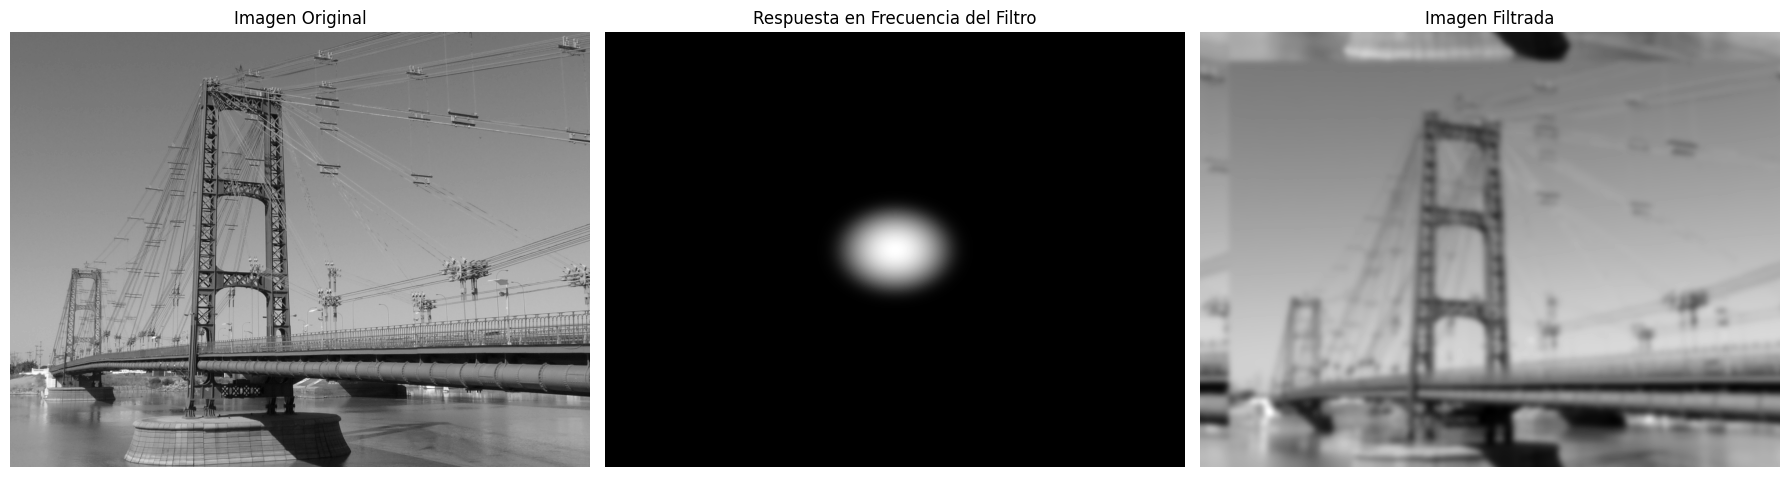

In [ ]:
# Cargar imagen en escala de grises
img = cv.imread('/content/drive/My Drive/PDI/puente.jpg', cv.IMREAD_GRAYSCALE)

# Definir sigma para el filtro gaussiano
sigma = 5

# Crear la máscara del filtro Gaussiano pasa-bajos de 35x35
filter_mask = gaussian_low_pass_filter((35, 35), sigma)

# Calcular la TDF de la máscara del filtro
filter_dft = np.fft.fft2(filter_mask, img.shape)  # Calcula la TDF y escala a tamaño de imagen
filter_dft_shift = np.fft.fftshift(filter_dft)      # Centrar el espectro

# Calcular la Transformada de Fourier de la imagen
img_dft = np.fft.fft2(img)
img_dft_shift = np.fft.fftshift(img_dft)

# Calcular el producto de las transformadas para filtrar la imagen en el dominio de la frecuencia
filtered_dft_shift = img_dft_shift * filter_dft_shift

# Transformada de Fourier inversa para obtener la imagen filtrada
filtered_dft = np.fft.ifftshift(filtered_dft_shift)
filtered_img = np.fft.ifft2(filtered_dft)
filtered_img = np.abs(filtered_img)

# Visualizar la imagen original, la respuesta en frecuencia del filtro, y la imagen filtrada
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(filter_dft_shift)), cmap='gray')
plt.title('Respuesta en Frecuencia del Filtro')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_img, cmap='gray')
plt.title('Imagen Filtrada')
plt.axis('off')

plt.tight_layout()
plt.show()



Repita el ejercicio anterior pero ahora utilice un filtro gaussiano definido en
frecuencia. Compare los resultados.


In [ ]:
# Función para crear un filtro Gaussiano pasa-bajos hecho en frecuencia
def gaussian_low_pass_filter(shape, sigma):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols), dtype=np.float32)

    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - center_row) ** 2 + (v - center_col) ** 2)
            filter_mask[u, v] = np.exp(-(distance**2 / (2 * sigma**2)))

    return filter_mask

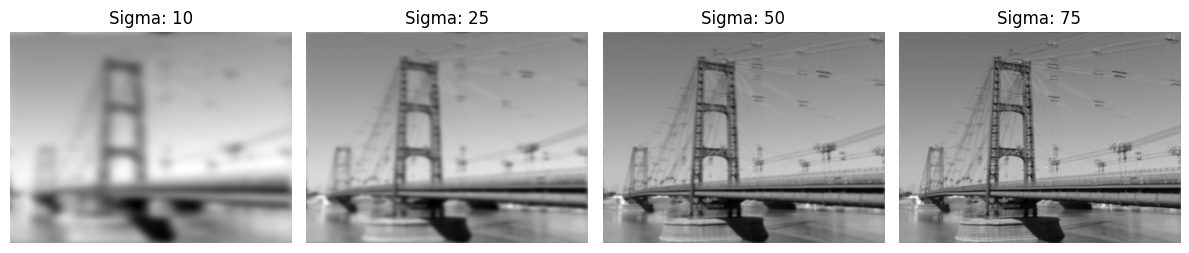

In [ ]:
# Cargar imagen en escala de grises
img = cv.imread('/content/drive/My Drive/PDI/puente.jpg', cv.IMREAD_GRAYSCALE)

# Frecuencias de corte para demostración
sigma_values = [10, 25, 50, 75]

plt.figure(figsize=(12, 8))

for i, sigma in enumerate(sigma_values, 1):
    filter_mask = gaussian_low_pass_filter(img.shape, sigma)
    filtered_image = apply_filter(img, filter_mask)

    plt.subplot(1, len(sigma_values), i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Sigma: {sigma}')
    plt.axis('off')

plt.tight_layout()
plt.show()

5. Repita los ejercicios del 1 al 4, para filtros pasa-altos.


In [ ]:
def ideal_high_pass_filter(shape, cutoff_frequency):
    rows, cols = shape                                        # Consigue las dimensiones de la imagen
    center_row, center_col = rows // 2, cols // 2             # Consigue el centro de la imagen
    filter_mask = np.ones((rows, cols), dtype=np.float32)    # Crea una matriz de igual tamaño que la imagen pero llena de 0s
    cv.circle(filter_mask, (center_col, center_row),
               cutoff_frequency, 0, thickness=-1)             # Dibuja un circulo de readio "frecuencia de corte" en el centro de la imagen
    return filter_mask                                        # Retorna la máscara

In [ ]:
def butterworth_high_pass_filter(shape, cutoff_frequency, order):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols), dtype=np.float32)

    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - center_row) ** 2 + (v - center_col) ** 2)                 # Calcula la distancia al centro de la imagen D(u,v)
            filter_mask[u, v] = 1 - (1 / (1 + (distance / cutoff_frequency) ** (2 * order)))  # Crea la máscara para Butterwort

    return filter_mask

In [ ]:
# Función para crear un filtro Gaussiano pasa-bajos hecho en frecuencia
def gaussian_high_pass_filter(shape, sigma):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols), dtype=np.float32)

    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - center_row) ** 2 + (v - center_col) ** 2)
            filter_mask[u, v] = 1 - np.exp(-(distance**2 / (2 * sigma**2)))

    return filter_mask

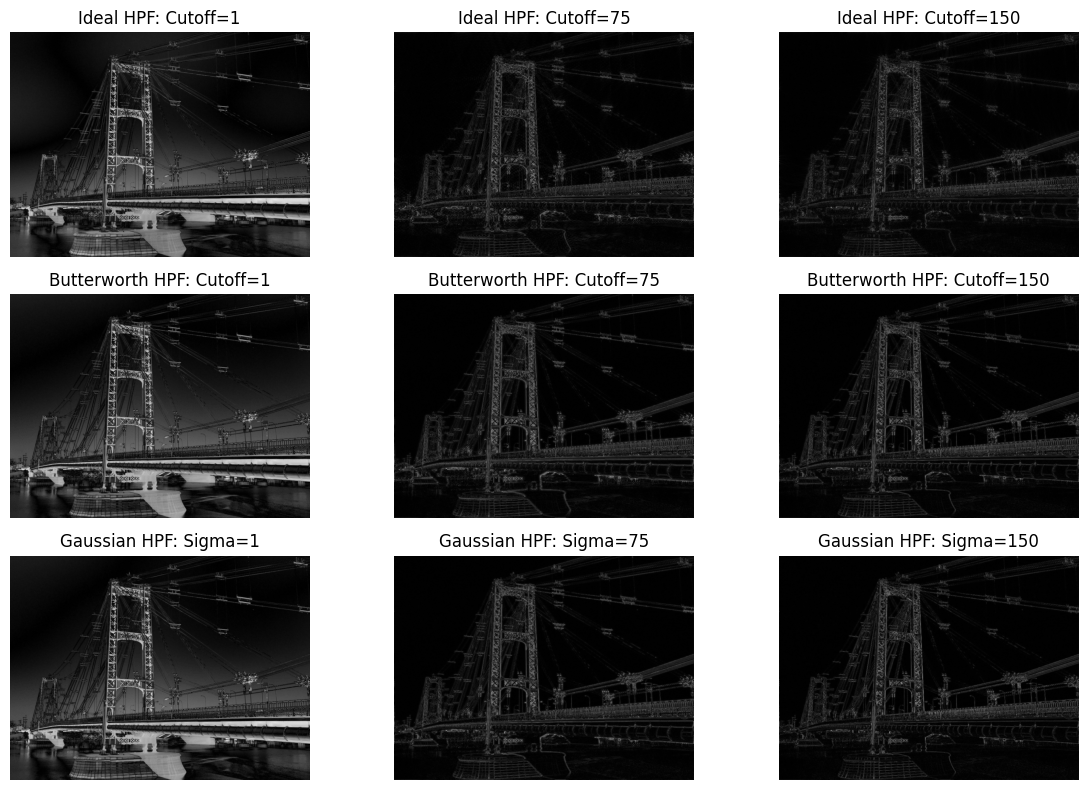

In [ ]:
# Cargar imagen en escala de grises
img = cv.imread('/content/drive/My Drive/PDI/puente.jpg', cv.IMREAD_GRAYSCALE)

# Definir sigma para el filtro gaussiano
sigma = 5

# Frecuencias de corte para demostración
sigma_values = [1, 75, 150]

orders = [1]

# Frecuencias de corte para demostración
cutoff_frequencies = [1, 75, 150]

# Crear figuras para mostrar resultados
plt.figure(figsize=(12, 8))

for i, cutoff in enumerate(cutoff_frequencies):
    sigma = sigma_values[i]  # Usar un valor de sigma correspondiente a cada cutoff

    filter_mask_ideal = ideal_high_pass_filter(img.shape, cutoff)
    filtered_image_ideal = apply_filter(img, filter_mask_ideal)

    filter_mask_butterworth = butterworth_high_pass_filter(img.shape, cutoff, 1)  # Order es 1 por simplicidad
    filtered_image_butterworth = apply_filter(img, filter_mask_butterworth)

    filter_mask_gaussian = gaussian_high_pass_filter(img.shape, sigma)
    filtered_image_gaussian = apply_filter(img, filter_mask_gaussian)

    plt.subplot(3, len(cutoff_frequencies), i + 1)
    plt.imshow(filtered_image_ideal, cmap='gray')
    plt.title(f'Ideal HPF: Cutoff={cutoff}')
    plt.axis('off')

    plt.subplot(3, len(cutoff_frequencies), i + 1 + len(cutoff_frequencies))
    plt.imshow(filtered_image_butterworth, cmap='gray')
    plt.title(f'Butterworth HPF: Cutoff={cutoff}')
    plt.axis('off')

    plt.subplot(3, len(cutoff_frequencies), i + 1 + 2 * len(cutoff_frequencies))
    plt.imshow(filtered_image_gaussian, cmap='gray')
    plt.title(f'Gaussian HPF: Sigma={sigma}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Ejercicio 4:** Filtrado homomórfico

Un uso extendido del filtrado homomórfico es la corrección de iluminación no uniforme en distintas zonas de la imagen, generalmente con alto contenido de información en la zona de bajo brillo. Por ejemplo, en filmaciones de cámaras de seguridad y fotos con luz del día con sol de frente. En imágenes de este tipo, el filtro homomórfico corrige el contraste en la zona de interés y acentúa los detalles simultáneamente.

1. Genere la función de transferencia H que caracteriza a un filtro homomórfico.

In [ ]:
def homomorphic_filter(img, rl=0.05, rh=0.5, c=25, orden=2):
    rows, cols = img.shape

    # USAMOS FILTRO GAUSSIANO:
    x = np.linspace(-1, 1, cols)
    y = np.linspace(-1, 1, rows)
    X, Y = np.meshgrid(x, y)
    d = np.sqrt(X**2 + Y**2)
    mask = (rh - rl) * (1 - np.exp(-c * d**orden)) + rl

    # APLICAR FILTRO:
    img_log = np.log1p(img)
    img_fft = np.fft.fft2(img_log)
    img_fft_shift = np.fft.fftshift(img_fft)
    img_fft_filt = img_fft_shift * mask
    img_filt = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_filt)))
    img_exp = np.expm1(img_filt)
    img_norm = cv.normalize(img_exp, None, 0, 255, cv.NORM_MINMAX)

    img_filtered = np.uint8(img_norm)

    return img_filtered

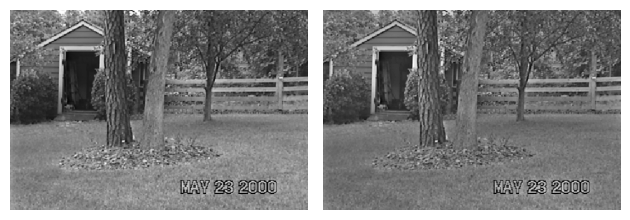

In [ ]:
casilla = cv.imread("/content/drive/My Drive/PDI/casilla.tif",cv.IMREAD_GRAYSCALE)

# Creo el filtro
gamma_l = 0.3
gamma_h = 0.9
c = 40
orden = 1
casilla_filtered = homomorphic_filter(casilla,gamma_l,gamma_h,c,orden)

# Grafico:
fig, ax = plt.subplots(1,2)
ax[0].imshow(casilla,cmap='gray')
ax[1].imshow(casilla_filtered,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout()
plt.show()


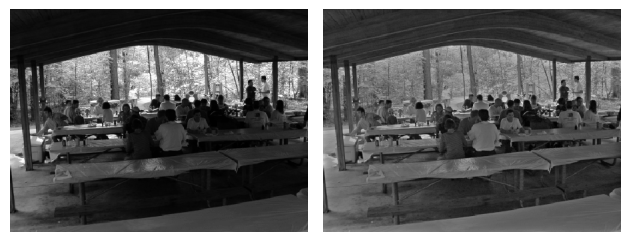

In [ ]:
reunion = cv.imread("/content/drive/My Drive/PDI/reunion.tif",cv.IMREAD_GRAYSCALE)

# Creo el filtro
gamma_l = 0.3
gamma_h = 0.6
c = 20
orden = 1
reunion_filtered = homomorphic_filter(reunion,gamma_l,gamma_h,c,orden)

# Grafico:
fig, ax = plt.subplots(1,2)
ax[0].imshow(reunion,cmap='gray')
ax[1].imshow(reunion_filtered,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout()
plt.show()


Efectos al variar los parámetros:

- **gamma_l:** ajusta amplitudes de las frecuencias bajas (atenuación mínima aplicada a las frecuencias cercanas al centro del espectro de frecuencia). Si aumento gamma_l, realzo detalles de las bajas frecuencias.
- **gamma_h:** ajusta amplitudes de las frecuencias altas (atenuación máxima aplicada a las frecuencias lejanas al centro del espectro de frecuencia). Si aumento gamma_h, realzo detalles de las altas frecuencias.
- **c:** controla la escala espacial o de frecuencia. Valor más alto amplía el rango de frecuencias afectadas por el filtro, dando más o menos nitidez en más frecuencias.
- **orden:** varía la intensidad del realce y la claridad de los detalles de la imágen. Valor más alto tiene cambios más pronunciados en las frecuencias en función de la distancia radial.


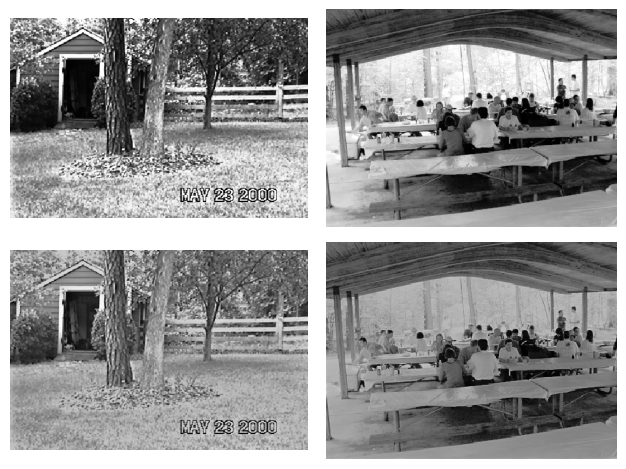

In [ ]:
casilla_eq = cv.equalizeHist(casilla)
reunion_eq = cv.equalizeHist(reunion)
casilla_eq_filtered = homomorphic_filter(casilla_eq,0.3,0.5,60,1)
reunion_eq_filtered = homomorphic_filter(reunion_eq,0.6,1.1,0.9,1)

fig,ax = plt.subplots(2,2)
ax[0,0].imshow(casilla_eq,cmap='gray')
ax[0,0].axis('off')
ax[1,0].imshow(casilla_eq_filtered,cmap='gray')
ax[1,0].axis('off')
ax[0,1].imshow(reunion_eq,cmap='gray')
ax[0,1].axis('off')
ax[1,1].imshow(reunion_eq_filtered,cmap='gray')
ax[1,1].axis('off')
plt.tight_layout()
plt.show()

## **Ejercicio 5:** Filtros de acentuado en el dominio frecuencial

1. A partir de la definicióon de una máscara de filtrado pasa-altos en el dominio
espacial, obtenga la función de transferencia correspondiente a un filtro de
alta potencia según HAP = (A − 1) + HP A, y a un filtro de énfasis de alta
frecuencia según: HEAF = a + b HP A.


In [ ]:
def PasaAltos(D0,imagen):
  filas, columnas = imagen.shape;
  crow, ccol = filas // 2, columnas // 2;

  mascara = np.zeros((filas, columnas));
  cv.circle(mascara, (ccol, crow), D0, 1, -1);

  mascara = 1-mascara;
  return mascara

In [ ]:
def PasaAltosButter(D0,n,img):
  M, N = img.shape
  # Creamos una matriz de coordenadas para calcular la distancia desde el centro
  x = np.arange(-N // 2, N // 2)
  y = np.arange(-M // 2, M // 2)
  X, Y = np.meshgrid(x, y)

  # Calculamos la distancia desde el centro de la imagen
  D_uv = np.sqrt(X**2 + Y**2)

  # Aplicamos la fórmula del filtro Butterworth
  H_uv = 1 / (1 + (D0 / D_uv)**(2 * n))
  return H_uv

In [ ]:
def AltaPotencia(pasaAltos, A):
  altaPotencia = (A-1)+pasaAltos
  return altaPotencia


In [ ]:
def EnfasisAltaFrecuencia(a,b,mascaraPA):
  MascaraEAF = a+b*mascaraPA
  return MascaraEAF

In [ ]:
def AltaFrecuenciaimg(img,A,imgPA):
  img_AF = (A-1)*img+imgPA
  return img_AF

2. Elija apropiadamente los valores de los parámetros A, a y b y aplique los filtros a la imagen 'camaleon.tif', visualizando la imagen original junto a su TDF, y la imagen resultante con su TDF.


(247, 372)


<ipython-input-53-be3d63661b4e>:12: RuntimeWarning: divide by zero encountered in divide
  H_uv = 1 / (1 + (D0 / D_uv)**(2 * n))


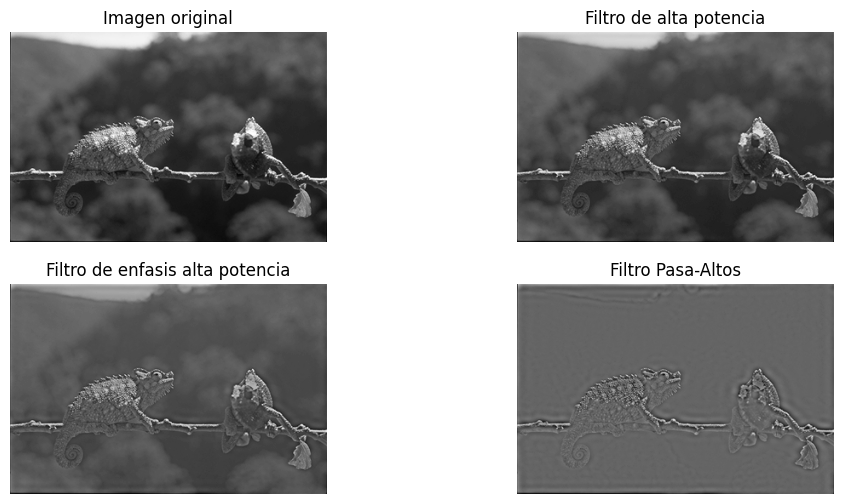

In [ ]:
# cargo imagen
img = cv.imread("/content/drive/My Drive/PDI/camaleon.tif",cv.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
img_fft = np.fft.fftshift(f)


# Calcular la magnitud de la FFT
magnitude_spectrum = 20*np.log(np.abs(img_fft))

# Normalizar la magnitud para que esté en el rango [0, 1]
norm_img_fft = (magnitude_spectrum - np.min(magnitude_spectrum)) / (np.max(magnitude_spectrum) - np.min(magnitude_spectrum))

print(img.shape)
# creo filtro pasa altos
D0 = 25;
n = 8;
mascaraP_A = PasaAltosButter(D0,n,img_fft)
#mascaraP_A = PasaAltos(D0,img_fft)
imgP_A1 = img_fft*mascaraP_A
imgP_A = np.fft.ifft2(np.fft.ifftshift(imgP_A1)).real

# filtro de alta potencia
A = 5
imagenAP1 = AltaPotencia(mascaraP_A,A)
imagenAP = np.fft.ifft2(np.fft.ifftshift(imagenAP1*img_fft)).real

# filtro enfasis alta potencia
a = 4
b = 4.5
maskEAF = EnfasisAltaFrecuencia(a,b,mascaraP_A)
imgEAF = np.fft.ifft2(np.fft.ifftshift(maskEAF*img_fft)).real

# Mostrar la imagen original y la imagen filtrada
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(imagenAP, cmap='gray')
plt.title('Filtro de alta potencia')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(imgEAF, cmap='gray')
plt.title('Filtro de enfasis alta potencia')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(imgP_A, cmap='gray')
plt.title('Filtro Pasa-Altos')
plt.axis('off')
plt.show()




3. Compare la imagen de alta potencia con la que se obtiene al aplicar el filtro
en el dominio espacial.

<ipython-input-53-be3d63661b4e>:12: RuntimeWarning: divide by zero encountered in divide
  H_uv = 1 / (1 + (D0 / D_uv)**(2 * n))


(-0.5, 371.5, 246.5, -0.5)

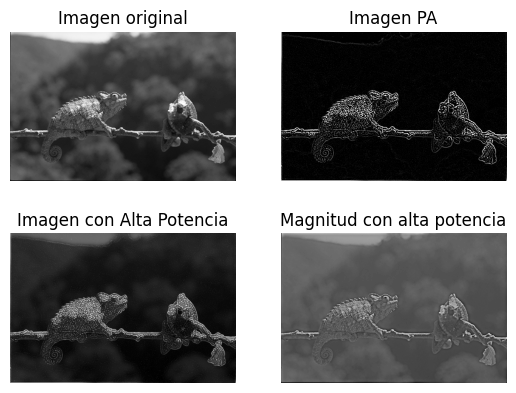

In [ ]:
img = cv.imread("/content/drive/My Drive/PDI/camaleon.tif",cv.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
img_fft = np.fft.fftshift(f)

#Armo el filtro butter
D0 = 30;
n = 2.5
mascaraP_A = PasaAltosButter(D0,n,img)

mask1 = np.array([[1, 1, 1],
                  [1, -8, 1],
                  [1, 1, 1]])


#aplico a imagen
#img_P_A = np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(img)) * mascaraP_A)).real
img_P_A = cv.filter2D(img, -1, mask1)
#aplico Alta frecuencia a imagen y a fft
A = 1.7
imgAF = AltaFrecuenciaimg(img,A,img_P_A)
mascaraA_F = AltaPotencia(mascaraP_A, A)
img_fft_AF = img_fft*mascaraA_F
imgAF_mag = np.fft.ifft2(np.fft.ifftshift(img_fft_AF)).real


plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_P_A, cmap='gray')
plt.title('Imagen PA')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(imgAF, cmap='gray')
plt.title('Imagen con Alta Potencia')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(imgAF_mag, cmap='gray')
plt.title('Magnitud con alta potencia')
plt.axis('off')


# **Ejercicio 6:** Ejercicios y aplicaciones

1. El método de la transformada rápida de Fourier es una forma simplificada de cálculo de la TDF, diseñado utilizando las propiedades de la transformada y solo se puede aplicar a imágenes cuyos tamaños sean potencia de 2 (es lo que permite simplificar aún más los cálculos). Evalúe el rendimiento de FFT (Fast Fourier Transform) respecto de la TDF.

- Cargue una imagen y obtenga el tamaño óptimo (para filas y columnas) al cual debe llevar la imagen para el cálculo de la FFT.
- A partir de la imagen original genere una de tamaño óptimo (N_opt × M_opt) agregando ceros.
- Genere una imagen cuyo tamaño en filas y columnas sea 1 px menor al tamaño óptimo ((N_opt − 1) × (M_opt − 1)) agregando ceros.
- Calcule la TDF de las 3 imágenes, visualice las magnitudes de las TDFs y saque conclusiones, evalúe el tiempo de cómputo de cada una.
- ¿Qué efecto numérico (objetivo) y a la vista (subjetivo) produce el agregado de ceros?

In [ ]:
def get_fft(image):
    img_fft = np.fft.fft2(image)
    img_fft_shift = np.fft.fftshift(img_fft)
    magnitude_spectrum = np.abs(img_fft_shift)
    # logaritmo para mayor contraste:
    log_magnitude_spectrum = np.log(magnitude_spectrum + 1e-6) # sumo epsilon p/ evitar log(0)
    return log_magnitude_spectrum

In [ ]:
reunion = cv.imread("/content/drive/My Drive/PDI/reunion.tif",cv.IMREAD_GRAYSCALE)

# obtengo dimensiones óptimas con función de opencv
h = cv.getOptimalDFTSize(reunion.shape[0])
w = cv.getOptimalDFTSize(reunion.shape[1])

# hago resize haciendo zero-padding
reunion_resized = cv.copyMakeBorder(reunion,0,h - reunion.shape[0],0,w - reunion.shape[1],cv.BORDER_CONSTANT)
new_h = h - 1
new_w = w - 1
reunion_resized_1 = cv.copyMakeBorder(reunion, 0, new_h - reunion.shape[0], 0, new_w - reunion.shape[1], cv.BORDER_CONSTANT)

print(reunion_resized.shape,reunion_resized_1.shape)

(360, 450) (359, 449)


In [ ]:
import time

In [ ]:
ini = time.time()
reunion_dft = get_fft(reunion)
fin = time.time()
print(f"fft imagen normal: {fin-ini:.4f} segundos")

ini = time.time()
reunion_resized_dft = get_fft(reunion_resized)
fin = time.time()
print(f"fft imagen dimensiones óptimas: {fin-ini:.4f} segundos")

ini = time.time()
reunion_resized_1_dft = get_fft(reunion_resized_1)
fin = time.time()
print(f"fft imagen dimensiones óptimas - 1px: {fin-ini:.4f} segundos")

fft imagen normal: 0.0309 segundos
fft imagen dimensiones óptimas: 0.0160 segundos
fft imagen dimensiones óptimas - 1px: 0.0234 segundos


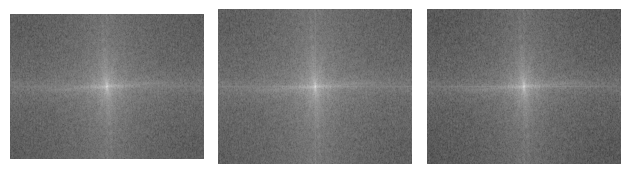

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(reunion_dft,cmap='gray')
ax[0].axis('off')
ax[1].imshow(reunion_resized_dft,cmap='gray')
ax[1].axis('off')
ax[2].imshow(reunion_resized_1_dft,cmap='gray')
ax[2].axis('off')
plt.tight_layout()
plt.show()

2. Realice una aplicación de preprocesamiento para OCR. La imagen de entrada es un texto escaneado (puede utilizar parrafo0.jpg y parrafo1.jpg), usted debe identificar si el texto está rotado y de ser así, debe corregir la orientación del texto.

In [ ]:
def rotate_to_angle(original_image, image_to_rotate):

    # Aplicar la transformada de Fourier a las imágenes
    fft_original = np.real(np.fft.fft2(original_image)).astype(np.uint8)
    fft_to_rotate = np.real(np.fft.fft2(image_to_rotate)).astype(np.uint8)

    # Calcular el espectro de potencia
    power_spectrum_original = np.abs(fft_original) ** 2
    power_spectrum_to_rotate = np.abs(fft_to_rotate) ** 2

    # Calcular la correlación cruzada entre los espectros de potencia
    cross_correlation = cv.matchTemplate(power_spectrum_original, power_spectrum_to_rotate, cv.TM_CCORR_NORMED)

    # Encontrar la posición del valor máximo en la matriz de correlación cruzada
    _, max_val, _, max_loc = cv.minMaxLoc(cross_correlation)

    # Calcular el desplazamiento en píxeles desde la posición central hasta la posición del valor máximo
    rows, cols = cross_correlation.shape
    displacement = np.array(max_loc) - np.array((cols // 2, rows // 2))

    # Calcular el ángulo de rotación correspondiente al desplazamiento
    angle = np.degrees(np.arctan2(displacement[1], displacement[0]))

    return (180 + angle)  # como el ángulo obtenido en el dominio de la frecuencia está entre [-180,180], sumo 180 para tener [0,360]

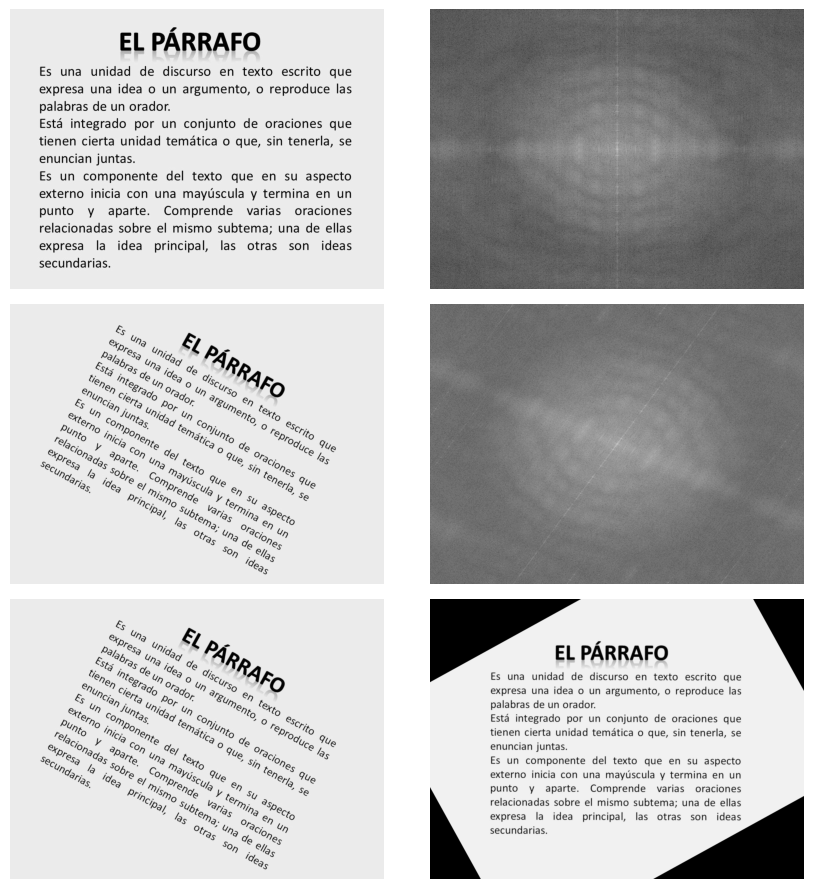

In [ ]:
imagen0 = cv.imread("/content/drive/My Drive/PDI/parrafo0.jpg",cv.IMREAD_GRAYSCALE)
imagen1 = cv.imread("/content/drive/My Drive/PDI/parrafo1.jpg",cv.IMREAD_GRAYSCALE)
imagen2 = cv.imread("/content/drive/My Drive/PDI/parrafo1.jpg",cv.IMREAD_GRAYSCALE)

angulo = rotate_to_angle(imagen0,imagen2)
rotated = imutils.rotate(imagen2,angulo)

fig,ax = plt.subplots(3,2,figsize=(9,9))

ax[0,0].imshow(imagen0,cmap="gray")
ax[0,0].axis('off')
ax[0,1].imshow(get_fft(imagen0),cmap="gray")
ax[0,1].axis('off')

ax[1,0].imshow(imagen1,cmap="gray")
ax[1,0].axis('off')
ax[1,1].imshow(get_fft(imagen1),cmap="gray")
ax[1,1].axis('off')

ax[2,0].imshow(imagen2,cmap="gray")
ax[2,0].axis('off')
ax[2,1].imshow(rotated,cmap="gray")
ax[2,1].axis('off')

plt.tight_layout()
plt.show()